In [27]:
pip install -U textblob

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 13.9 MB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/40/ad/c22887189c23cc133ae7cbad48c71312f1a962b960fe7f51fd792808a307/wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 14.6 MB/s eta 0:00:000:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [25]:
df = pd.read_csv('BA_Reviews.csv')
df.index = np.arange(1,len(df)+1)

In [27]:
df

,Passenger,Date of Publication,Ratings,Feedback
1,D Baker,6th June 2024,1,✅ Trip Verified | I strongly advise everyone t...
2,Val Rose,3rd June 2024,5,✅ Trip Verified | My partner and I were on the...
3,Jason George,1st June 2024,1,Not Verified | We had a Premium Economy retur...
4,S Barton,1st June 2024,9,✅ Trip Verified | I should like to review my ...
5,Marvin Daugherty,31st May 2024,2,✅ Trip Verified | We have flown with British A...
...,...,...,...,...
96,Allan Gittens,12th December 2023,4,✅ Trip Verified | BA A380's are showing their...
97,Lee Kitson,10th December 2023,9,✅ Trip Verified | Credit to BA - Flew to Sin...
98,S Horton,10th December 2023,9,✅ Trip Verified | The check in area for prem...
99,S Deyle,9th December 2023,10,✅ Trip Verified | The flight took off a littl...


In [29]:
df.isnull().sum()

Passenger              0
Date of Publication    0
Ratings                0
Feedback               0
dtype: int64

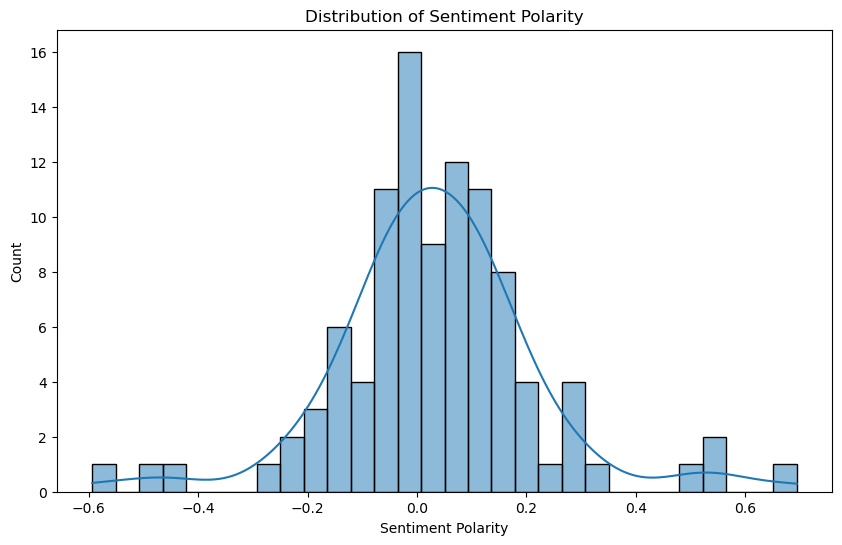

In [33]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the reviews
df['Sentiment'] = df['Feedback'].apply(get_sentiment)

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()

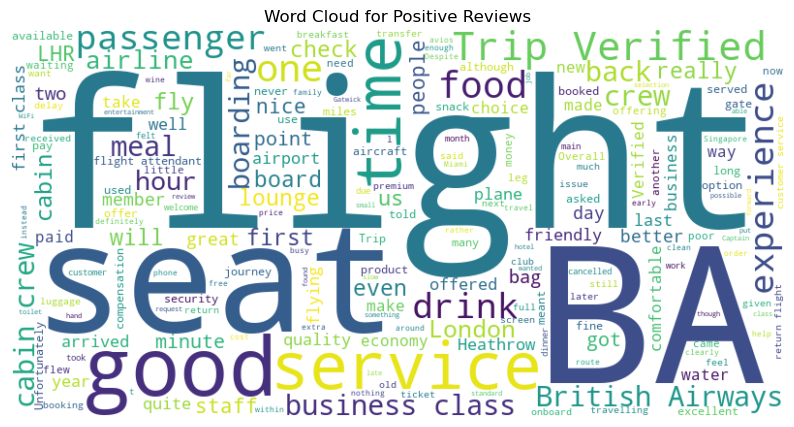

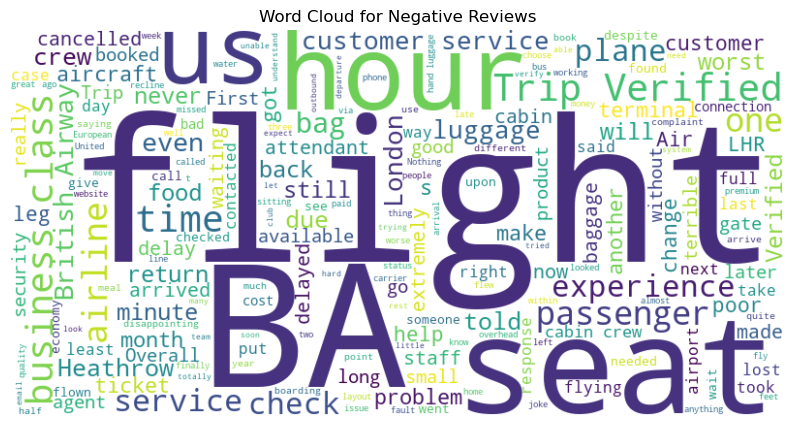

In [35]:
positive_reviews = ' '.join(df[df['Sentiment'] > 0]['Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate a word cloud for negative reviews
negative_reviews = ' '.join(df[df['Sentiment'] < 0]['Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

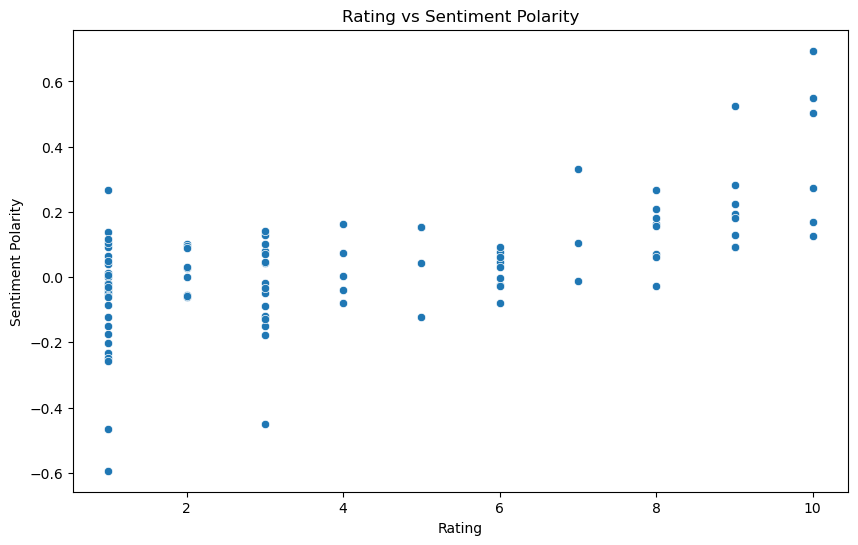

Correlation between Rating and Sentiment Polarity: 0.6113649445696608


<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ratings', y='Sentiment', data=df)
plt.title('Rating vs Sentiment Polarity')
plt.xlabel('Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

correlation = df['Ratings'].astype(float).corr(df['Sentiment'])
print(f"Correlation between Rating and Sentiment Polarity: {correlation}")

plt.savefig('BA_Scatter.jpg')

In [51]:
print(df['Sentiment'].describe())

count    100.000000
mean       0.034789
std        0.186515
min       -0.593750
25%       -0.055831
50%        0.035705
75%        0.119097
max        0.694231
Name: Sentiment, dtype: float64
